In [1]:
# Gerekli Kütüphaneler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
import missingno as msno
import pickle

In [2]:
# Pandas Ayarları
pd.pandas.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 170)

In [3]:
# Kendi Oluşturduğum Kütüphaneler
from dsmlbc_eda import DsmlbcEDA # EDA modülü
from data_prep import * # Veri ön işleme fonksiyonlarının oluşturulduğu modül

In [4]:
def load_data():
    """
    Diabetes veri setini döndürür.
    """
    return pd.read_csv("diabetes.csv")

In [5]:
# Veri Seti Yüklendi
df = load_data()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [6]:
# Diabetes veri seti için DsmlbcEDA nesnesi oluşturuldu.
eda = DsmlbcEDA(dataframe=df, target_col="Outcome")

In [7]:
# Veri seti hakkında temel incelemeler yapıldı.
eda.big_picture_summary()

First 5 Observations:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1


Last 5 Observations:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.900                     0.171   63        0
764            2      122             70             27        0 36.800

In [8]:
# Numerik değişkenleri belirleme
num_cols = eda.final_numerical_cols()
num_cols

['DiabetesPedigreeFunction',
 'Insulin',
 'Pregnancies',
 'SkinThickness',
 'BloodPressure',
 'BMI',
 'Age',
 'Glucose']

                           count    mean     std    min     1%     5%    10%    25%     50%     75%     90%     95%     99%     max
DiabetesPedigreeFunction 768.000   0.472   0.331  0.078  0.095  0.140  0.165  0.244   0.372   0.626   0.879   1.133   1.698   2.420
Insulin                  768.000  79.799 115.244  0.000  0.000  0.000  0.000  0.000  30.500 127.250 210.000 293.000 519.900 846.000
Pregnancies              768.000   3.845   3.370  0.000  0.000  0.000  0.000  1.000   3.000   6.000   9.000  10.000  13.000  17.000
SkinThickness            768.000  20.536  15.952  0.000  0.000  0.000  0.000  0.000  23.000  32.000  40.000  44.000  51.330  99.000
BloodPressure            768.000  69.105  19.356  0.000  0.000 38.700 54.000 62.000  72.000  80.000  88.000  90.000 106.000 122.000
BMI                      768.000  31.993   7.884  0.000  0.000 21.800 23.600 27.300  32.000  36.600  41.500  44.395  50.759  67.100
Age                      768.000  33.241  11.760 21.000 21.000 21.000 22.000

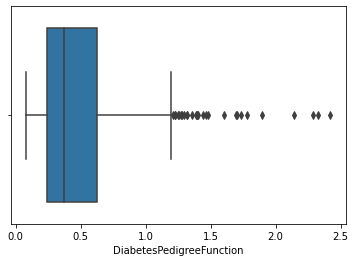

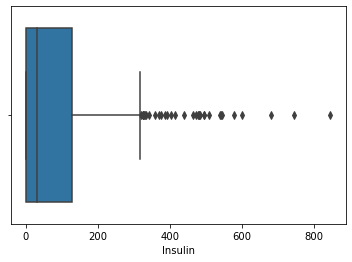

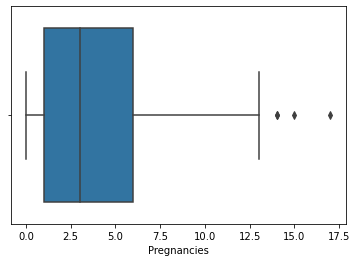

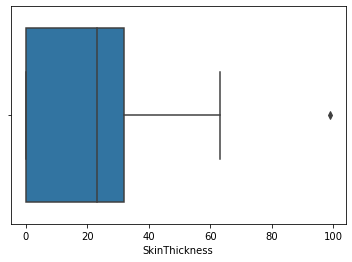

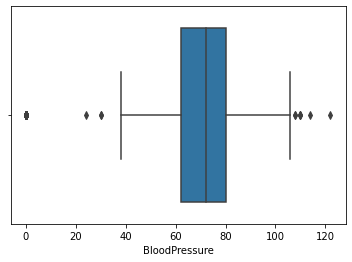

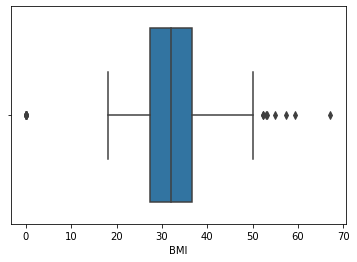

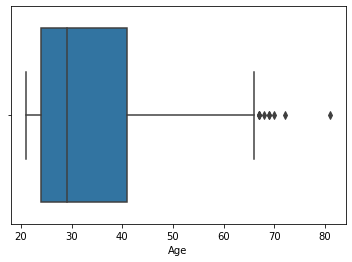

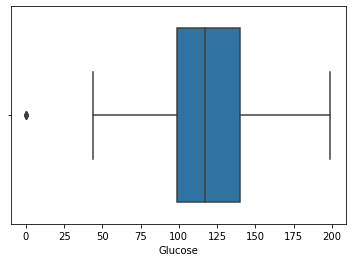

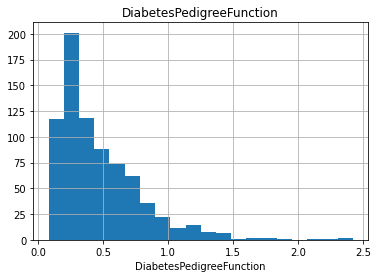

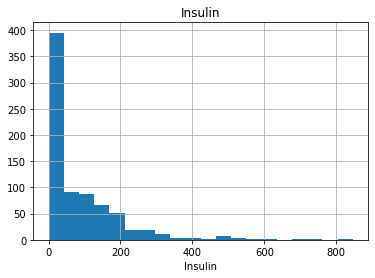

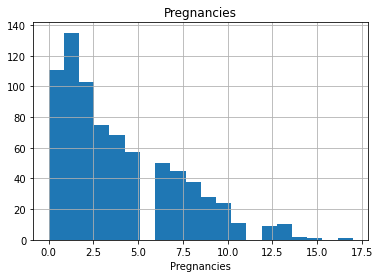

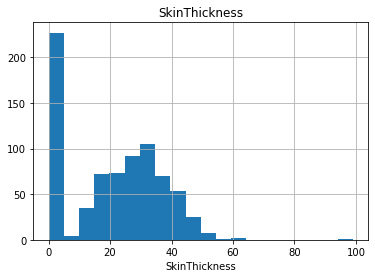

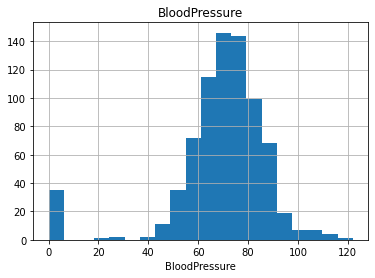

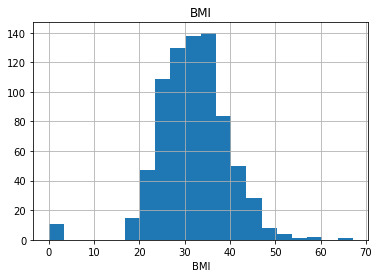

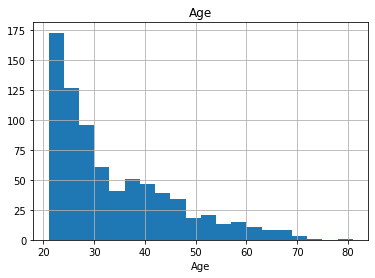

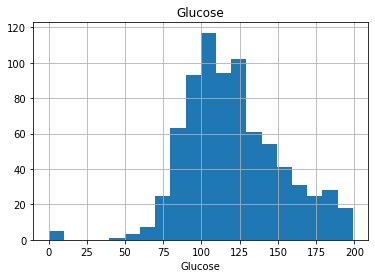

8 variables have been plotted.


In [9]:
# Numerik Değişken Analizi
eda.numerical_summary(desc="detail",
                      plot_outliers=True,
                      plotting=True)

In [10]:
# Numerik değişkenlere göre target analizi
eda.target_summary_with_num()

         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550


         Insulin
Outcome         
0         68.792
1        100.336


         Pregnancies
Outcome             
0              3.298
1              4.866


         SkinThickness
Outcome               
0               19.664
1               22.164


         BloodPressure
Outcome               
0               68.184
1               70.825


           BMI
Outcome       
0       30.304
1       35.143


           Age
Outcome       
0       31.190
1       37.067


         Glucose
Outcome         
0        109.980
1        141.257




In [11]:
# Numerik Değişkenlerin Birbirleri ile Karşılaştırılması
eda.numerical_comparison()

Spearman Corr Result is 
:                           DiabetesPedigreeFunction  Insulin  Pregnancies  SkinThickness  BloodPressure   BMI    Age  Glucose
DiabetesPedigreeFunction                     1.000    0.221       -0.043          0.180          0.030 0.141  0.043    0.091
Insulin                                      0.221    1.000       -0.127          0.541         -0.007 0.193 -0.114    0.213
Pregnancies                                 -0.043   -0.127        1.000         -0.085          0.185 0.000  0.607    0.131
SkinThickness                                0.180    0.541       -0.085          1.000          0.126 0.444 -0.067    0.060
BloodPressure                                0.030   -0.007        0.185          0.126          1.000 0.293  0.351    0.235
BMI                                          0.141    0.193        0.000          0.444          0.293 1.000  0.131    0.231
Age                                          0.043   -0.114        0.607         -0.067          0

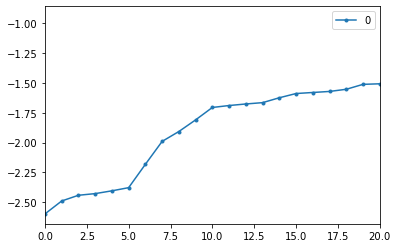

In [14]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)
clf.fit_predict(df)
df_scores = clf.negative_outlier_factor_
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True, xlim=[0,20], style='.-')
plt.show()

In [17]:
# Lof'a göre aykırı değerler çıkarıldı
lof_th = np.sort(df_scores)[10]
df = df[~(df_scores < lof_th)]

In [18]:
eda = DsmlbcEDA(dataframe=df, target_col="Outcome")

In [19]:
eda.big_picture_summary()

First 5 Observations:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137             40             35      168 43.100                     2.288   33        1


Last 5 Observations:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
763           10      101             76             48      180 32.900                     0.171   63        0
764            2      122             70             27        0 36.800